In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
%cd minibook-2nd-code/

[WinError 3] 지정된 경로를 찾을 수 없습니다: 'minibook-2nd-code/chapter2'
D:\work\jupyter\minibook-2nd-code


In [11]:
%cd chapter2/

[WinError 2] 지정된 파일을 찾을 수 없습니다: 'chapter2/'
D:\work\jupyter\minibook-2nd-code\chapter2


In [13]:
%ls data

 D 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 900E-C4EC

 D:\work\jupyter\minibook-2nd-code\chapter2\data 디렉터리

2017-01-05  오후 02:45    <DIR>          .
2017-01-05  오후 02:45    <DIR>          ..
2017-01-05  오전 09:29                14 .gitignore
2015-03-12  오전 11:41       146,377,586 nyc_data.csv
2015-03-12  오전 11:41       101,023,196 nyc_fare.csv
2017-01-05  오전 09:29            79,528 nycTaxiFareData2013.torrent
2017-01-05  오전 09:29           113,332 nycTaxiTripData2013.torrent
               5개 파일         247,593,656 바이트
               2개 디렉터리  308,083,937,280 바이트 남음


In [16]:
data_filename = 'data/nyc_data.csv'
fare_filename = 'data/nyc_fare.csv'

data = pd.read_csv(data_filename, parse_dates=['pickup_datetime',
                                              'dropoff_datetime'])
fare = pd.read_csv(fare_filename, parse_dates=['pickup_datetime'])

In [17]:
data.describe()

,rate_code,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
count,846945.000000,846945.000000,8.469450e+05,8.469450e+05,846945.000000,846945.000000,846945.000000,846945.000000
mean,1.026123,1.710272,8.125239e+02,9.958211e+00,-73.975155,40.750490,-73.974197,40.750967
std,0.223480,1.375266,1.609831e+04,6.525205e+03,0.035142,0.027224,0.033453,0.030766
min,0.000000,0.000000,-1.000000e+01,0.000000e+00,-74.098305,40.009911,-74.099998,40.009911
25%,1.000000,1.000000,3.610000e+02,1.050000e+00,-73.992371,40.736031,-73.991570,40.735207
50%,1.000000,1.000000,6.000000e+02,1.800000e+00,-73.982094,40.752975,-73.980614,40.753597
75%,1.000000,2.000000,9.600000e+02,3.200000e+00,-73.968048,40.767460,-73.965157,40.768227
max,6.000000,6.000000,4.294796e+06,6.005123e+06,-73.028473,40.996132,-73.027061,40.998592


In [19]:
data.head(3)

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,76942C3205E17D7E7FE5A9F709D16434,25BA06A87905667AA1FE5990E33F0E2E,VTS,1,NaN,2013-01-01 00:00:00,2013-01-01 00:05:00,3,300,0.61,-73.955925,40.781887,-73.963181,40.777832
1,517C6B330DBB3F055D007B07512628B3,2C19FBEE1A6E05612EFE4C958C14BC7F,VTS,1,NaN,2013-01-01 00:05:00,2013-01-01 00:21:00,1,960,3.28,-74.005501,40.745735,-73.964943,40.755722
2,ED15611F168E41B33619C83D900FE266,754AEBD7C80DA17BA1D81D89FB6F4D1D,CMT,1,N,2013-01-01 00:05:52,2013-01-01 00:12:18,1,386,1.50,-73.969955,40.799770,-73.954567,40.787392


In [22]:
data.columns

Index(['medallion', 'hack_license', 'vendor_id', 'rate_code',
       'store_and_fwd_flag', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'trip_time_in_secs', 'trip_distance',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude'],
      dtype='object')

In [23]:
p_lng = data.pickup_longitude
p_lat = data.pickup_latitude
d_lng = data.dropoff_longitude
d_lat = data.dropoff_latitude

In [25]:
p_lat

0         40.781887
1         40.745735
2         40.799770
3         40.755081
4         40.773716
5         40.768978
6         40.752197
7         40.730137
8         40.738644
9         40.740540
10        40.756424
11        40.713177
12        40.742928
13        40.764706
14        40.723415
15        40.768929
16        40.751724
17        40.749283
18        40.741100
19        40.763973
20        40.753067
21        40.765720
22        40.733608
23        40.740002
24        40.762859
25        40.755161
26        40.765041
27        40.723495
28        40.736504
29        40.778492
            ...    
846915    40.721607
846916    40.731232
846917    40.773766
846918    40.715004
846919    40.766407
846920    40.777802
846921    40.738510
846922    40.736427
846923    40.779636
846924    40.719723
846925    40.752960
846926    40.752167
846927    40.673527
846928    40.750988
846929    40.786549
846930    40.780659
846931    40.719746
846932    40.741180
846933    40.796059


In [26]:
def lat_lng_to_pixels(lat, lng):
    lat_rad = lat * np.pi / 180.0
    lat_rad = np.log(np.tan((lat_rad + np.pi / 2.0) / 2.0))
    x = 100 * (lng + 180.0) / 360.0
    y = 100 * (lat_rad - np.pi) / (2.0 * np.pi)
    return (x, y)

In [27]:
px, py = lat_lng_to_pixels(p_lat, p_lng)
px

0         29.456688
1         29.442916
2         29.452790
3         29.446824
4         29.453826
5         29.456878
6         29.448450
7         29.444608
8         29.446617
9         29.442624
10        29.452091
11        29.442427
12        29.448725
13        29.447780
14        29.442747
15        29.447585
16        29.449418
17        29.450883
18        29.450368
19        29.448240
20        29.452801
21        29.457078
22        29.443624
23        29.442588
24        29.451618
25        29.450016
26        29.452508
27        29.447700
28        29.445152
29        29.449582
            ...    
846915    29.441475
846916    29.449251
846917    29.450620
846918    29.439949
846919    29.457862
846920    29.457783
846921    29.447821
846922    29.448643
846923    29.457412
846924    29.447859
846925    29.452784
846926    29.448484
846927    29.449264
846928    29.445428
846929    29.452121
846930    29.449961
846931    29.447990
846932    29.442855
846933    29.452587


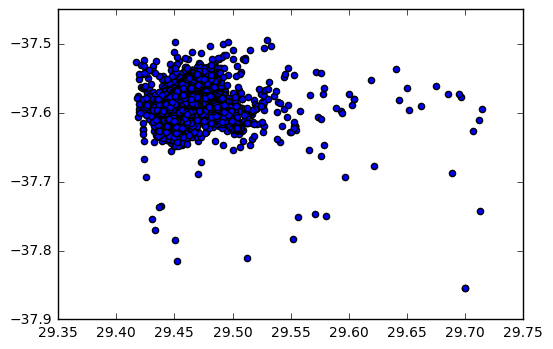

In [28]:
plt.scatter(px, py)

(29.399999999999999,
 29.550000000000001,
 -37.630000000000003,
 -37.539999999999999)

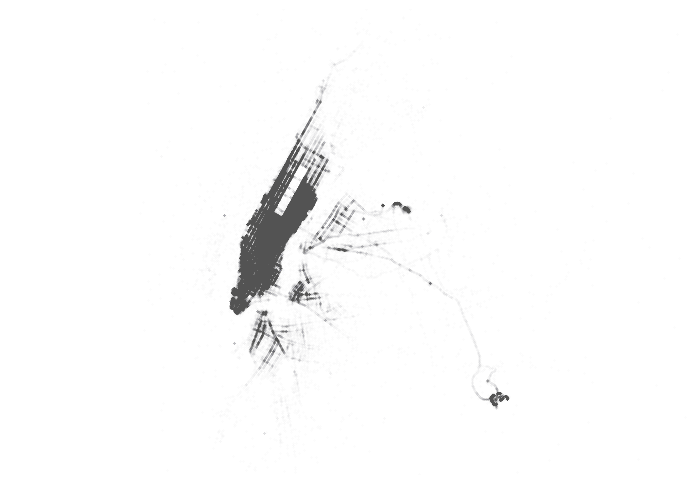

In [29]:
plt.figure(figsize=(8, 6)) # 그림의 크기(인치)
plt.scatter(px, py, s=.1, alpha=.03)  # s는 마커 크기, alpha는 불투명도
plt.axis('equal') # 가로 세로비 

# x, y 축 거리 제한
plt.xlim(29.40, 29.55)
plt.ylim(-37.63, -37.54)
plt.axis('off') # 축 표시 제거

In [30]:
px.count(), px.min(), px.max()

(846945, 29.417137499999995, 29.714313055555561)

In [31]:
px.mean(), px.median(), px.std()

(29.45134580776863, 29.449418333333337, 0.009761694274451149)

In [33]:
!conda install seaborn -q -y

Fetching package metadata .........
Solving package specifications: ..........

# All requested packages already installed.
# packages in environment at C:\Program Files\Anaconda3:
#
seaborn                   0.7.1                    py35_0  


In [35]:
import seaborn as sns
sns.__version__

'0.7.1'

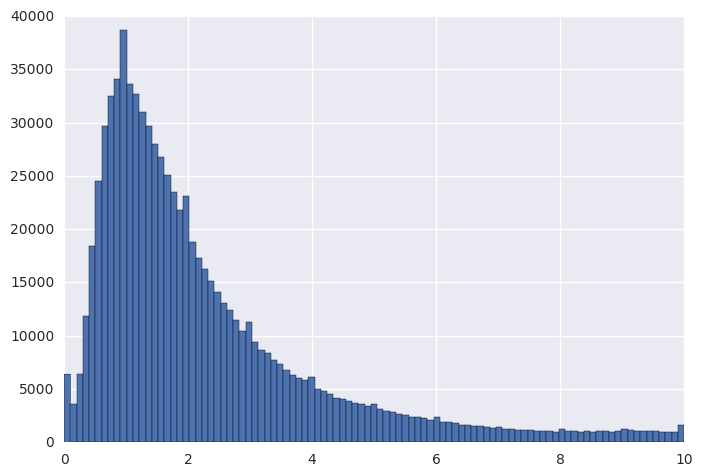

In [36]:
data.trip_distance.hist(bins=np.linspace(0., 10., 100))